# Task2 :  MOVIE RATING PREDICTION WITH PYTHON

  

**Background:**
- Task 2 focuses on predicting movie ratings based on various features.
- The dataset represents historical movie data, offering insights into factors influencing ratings.

**Approach:**
1. **Data Exploration:**
   - Understand dataset structure, identify key features, and assess data quality.
2. **Data Visualization:**
   - Visualize the distribution of movie ratings and explore feature correlations.
3. **Data Preprocessing:**
   - Encode categorical variables and handle missing data appropriately.
   - Conduct feature engineering if necessary.
4. **Model Building:**
   - Train models such as Linear Regression, Random Forest, and Decision Tree for rating prediction.
   - Evaluate models using metrics like Mean Squared Error (MSE) and R-squared.
5. **Fine-Tuning:**
   - Optimize model hyperparameters to improve prediction accuracy.
6. **Documentation:**
   - Create a README document outlining data preprocessing steps, model choices, and performance evaluation.
   - Include insights and visualizations in the documentation.

**Benefits:**
- Gain experience in regression tasks and predicting numerical values.
- Understand the impact of different features on movie ratings.
- Develop skills in fine-tuning models for improved performance.
- Showcase the ability to handle diverse datasets and regression modeling on GitHub.

# Import necessary libraries


In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# 1. Data Gathering:
The dataset for Task 2, Movie Rating Prediction, is a compilation of historical movie data encompassing a diverse range of features. The data provides valuable insights into the factors influencing movie ratings, making it a suitable dataset for regression analysis.

In [2]:
import pandas as pd

# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = 'C:/Users/User/Desktop/CODSOFT-Data Science/Task 2 MOVIE RATING PREDICTION WITH PYTHON/Dataset/IMDb Movies India.csv'

# Try reading the CSV file with different encodings
encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'utf-16']

for encoding in encodings:
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        # If reading is successful, break out of the loop
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding {encoding}")

# Display the first few rows of the DataFrame
data.head(10)


Failed to read with encoding utf-8


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
## Check the size
data.shape

(15509, 10)

In [4]:
## Basic info on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


The dataset contains a mix of numerical and categorical data

In [5]:
## Check basic statistic
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
## Check basic statistic
data.describe(include = "all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


# 2. Data Cleaning 
    In the Data Cleaning  step, the dataset undergoes essential operations:

1. **Removing Duplicates:**
   Identical entries are eliminated, ensuring each data point is unique.

2. **Removing NaN Rows and Columns:**
   Rows and columns with missing values are deleted, ensuring data integrity.


In [7]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates


6

In [8]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
data.dropna(inplace=True)


In [10]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
# Replace unwanted characters in 'Year' and 'Duration' columns
data['Year'] = data['Year'].replace(to_replace=r'\D', value='', regex=True)
data['Duration'] = data['Duration'].str.extract('(\d+)')  # Extract numeric part from 'Duration'

# Convert 'Year' and 'Duration' columns to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# Remove commas from 'Votes' column and convert to numeric
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''), errors='coerce')

# # Fill NaN values in 'Year' and 'Duration' columns with median
# data['Year'].fillna(data['Year'].median(), inplace=True)
# data['Duration'].fillna(data['Duration'].median(), inplace=True)

# # Continue with the rest of the cleaning steps
# data['Rating'].fillna(data['Rating'].mean(), inplace=True)
# data['Votes'].fillna(data['Votes'].median(), inplace=True)
# data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)
# data['Director'].fillna(data['Director'].mode()[0], inplace=True)
# data['Actor 1'].fillna(data['Actor 1'].mode()[0], inplace=True)
# data['Actor 2'].fillna(data['Actor 2'].mode()[0], inplace=True)
# data['Actor 3'].fillna(data['Actor 3'].mode()[0], inplace=True)



In [12]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [13]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [14]:
data["Rating"].value_counts()

Rating
6.8     200
6.5     192
6.2     190
6.6     163
7.1     163
       ... 
2.0       2
9.7       1
10.0      1
1.4       1
1.1       1
Name: count, Length: 83, dtype: int64

In [15]:
data.drop(data[data["Rating"] == 5.841621].index, inplace=True)
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [16]:
data["Rating"].value_counts()

Rating
6.8     200
6.5     192
6.2     190
6.6     163
7.1     163
       ... 
2.0       2
9.7       1
10.0      1
1.4       1
1.1       1
Name: count, Length: 83, dtype: int64

In [17]:
data.shape

(5659, 10)

# 3. Data Visualization and Exploration
    In this step, we'll analyze the dataset using histograms and bar charts to understand numerical and categorical distributions.

## 1. Distribution of Ratings:

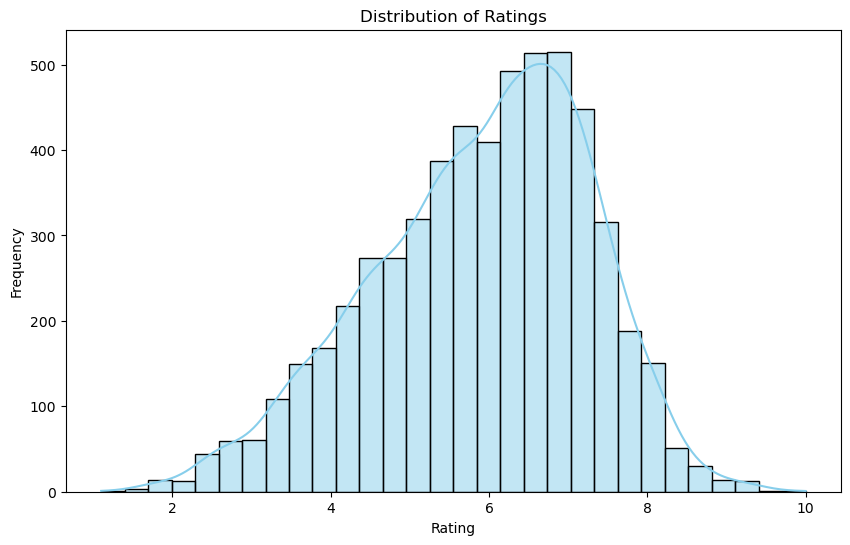

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## 2. Boxplot of Ratings:

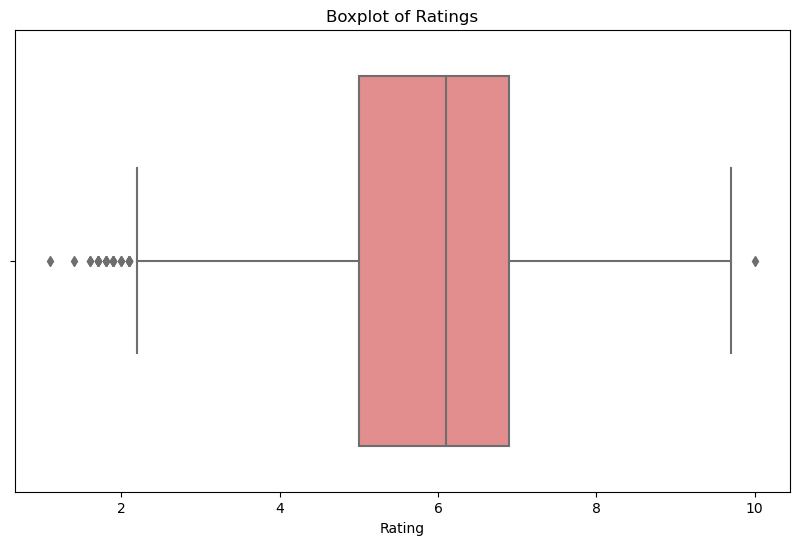

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Rating'], color='lightcoral')
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()


## 3.Count of Movies in Each Genre:

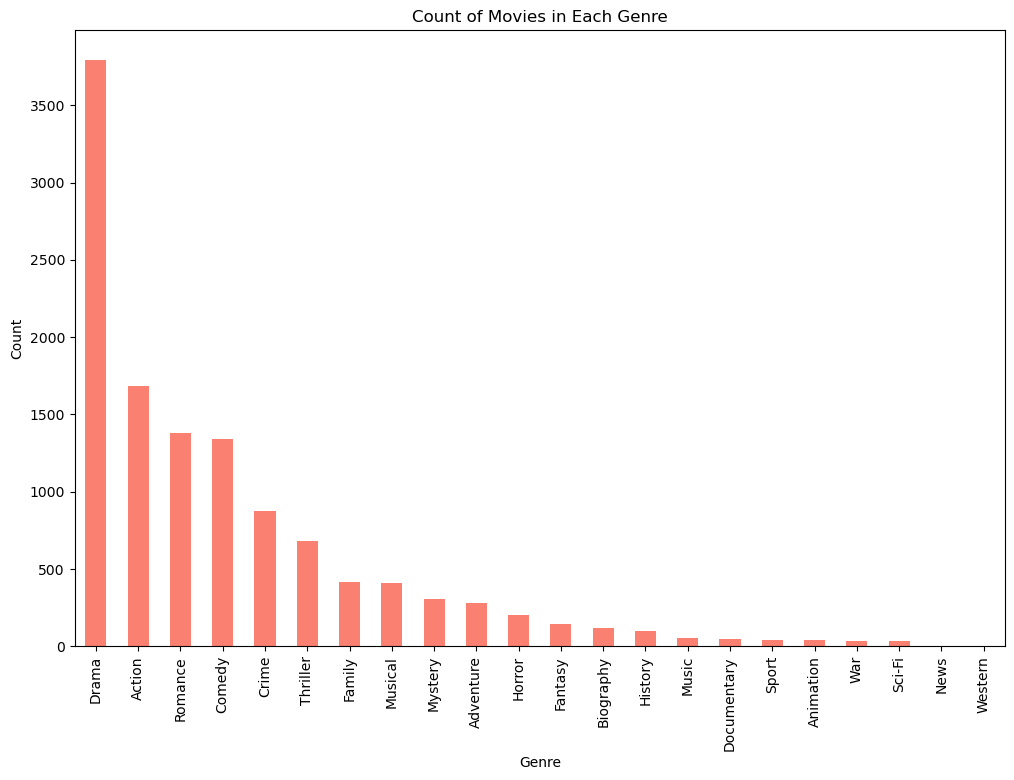

In [20]:
plt.figure(figsize=(12, 8))
genre_count = data['Genre'].str.split(',').explode().str.strip().value_counts()
genre_count.plot(kind='bar', color='salmon')
plt.title('Count of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


## 4. Scatter plot of Votes vs. Ratings:

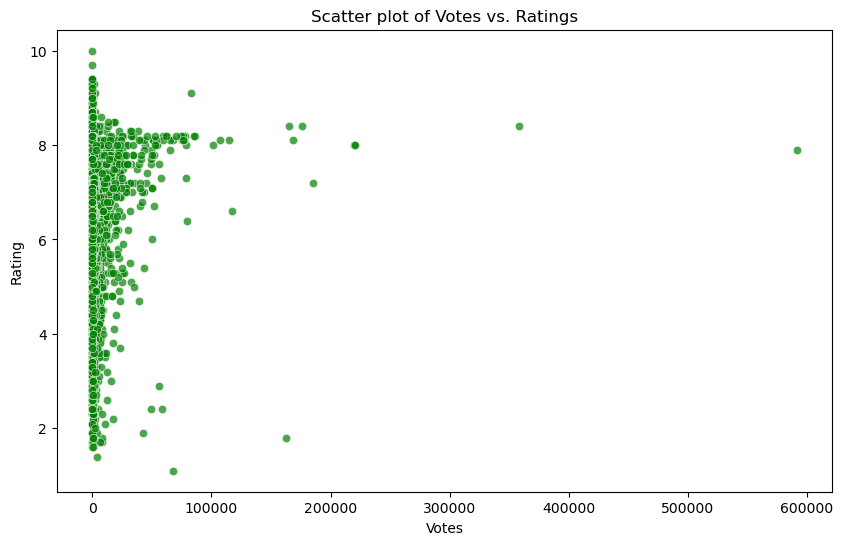

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Votes'], y=data['Rating'], color='green', alpha=0.7)
plt.title('Scatter plot of Votes vs. Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


## 5. Scatter plot of Ratings vs. Duration:

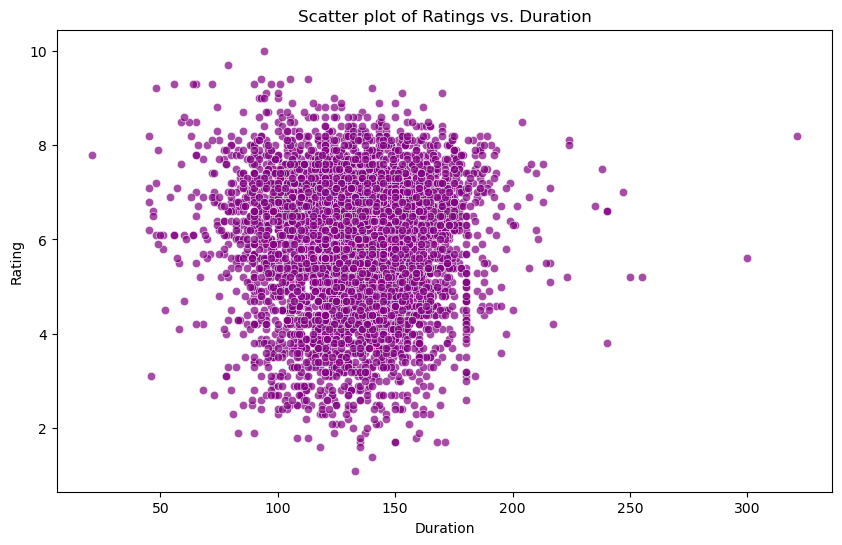

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Duration'], y=data['Rating'], color='purple', alpha=0.7)
plt.title('Scatter plot of Ratings vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()


## 6. Number of Movies Each Year:

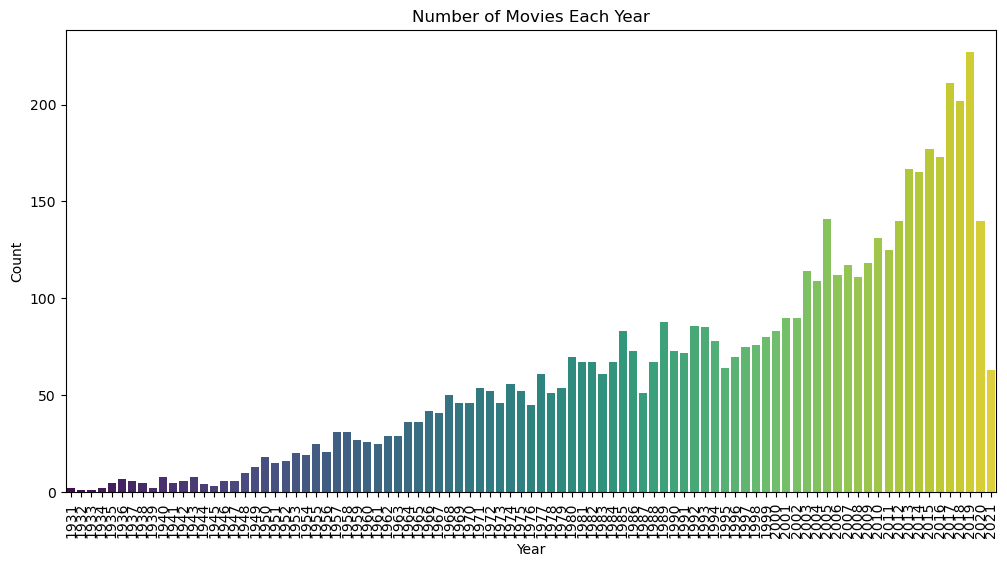

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Year'], palette='viridis')
plt.title('Number of Movies Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## 7. Boxplot of Duration:

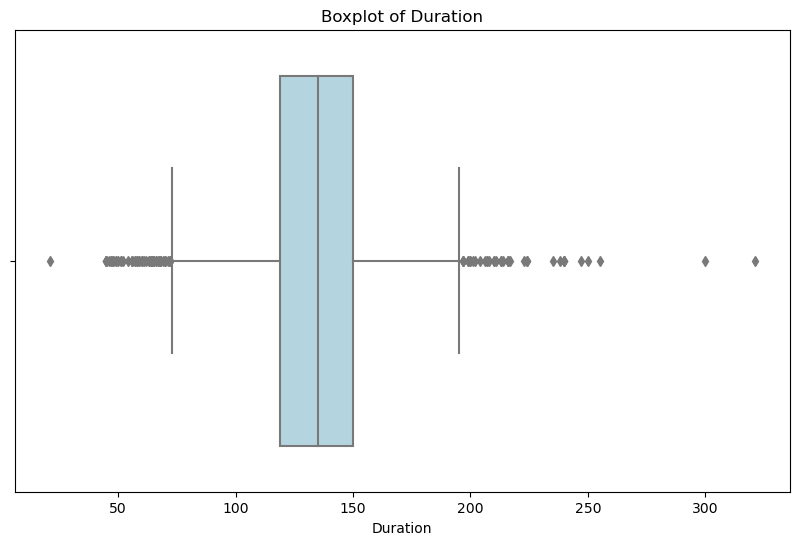

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Duration'], color='lightblue')
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()


## 8. Boxplot of Votes:

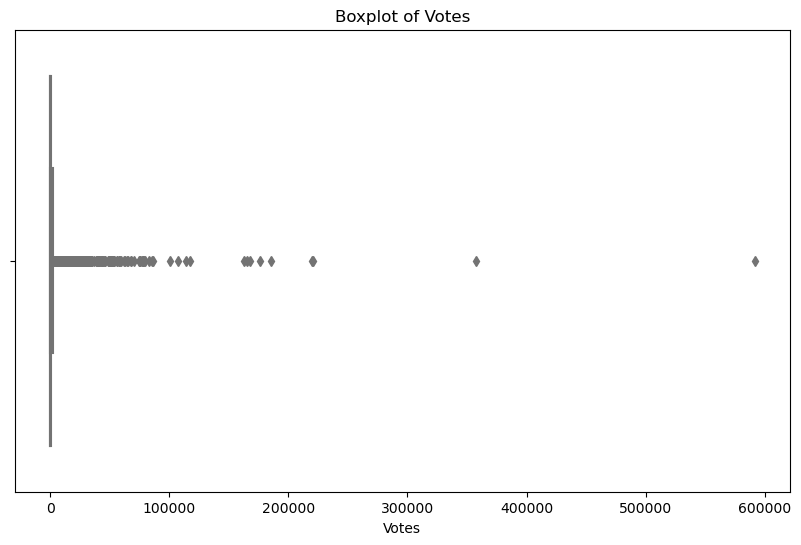

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Votes'], color='lightgreen')
plt.title('Boxplot of Votes')
plt.xlabel('Votes')
plt.show()


## 9. Heatmap of Correlation Matrix:

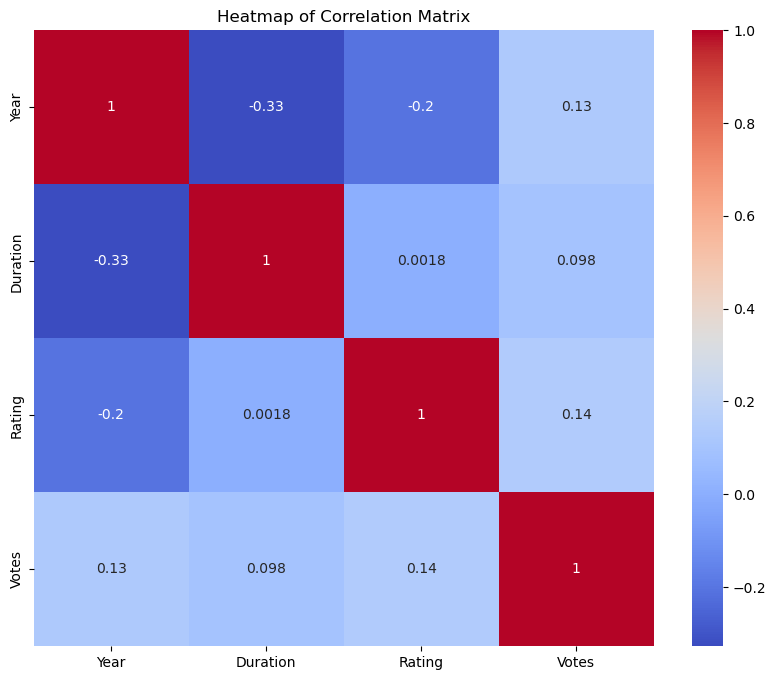

In [26]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


## 10. Top 10 Directors by Movie Count:

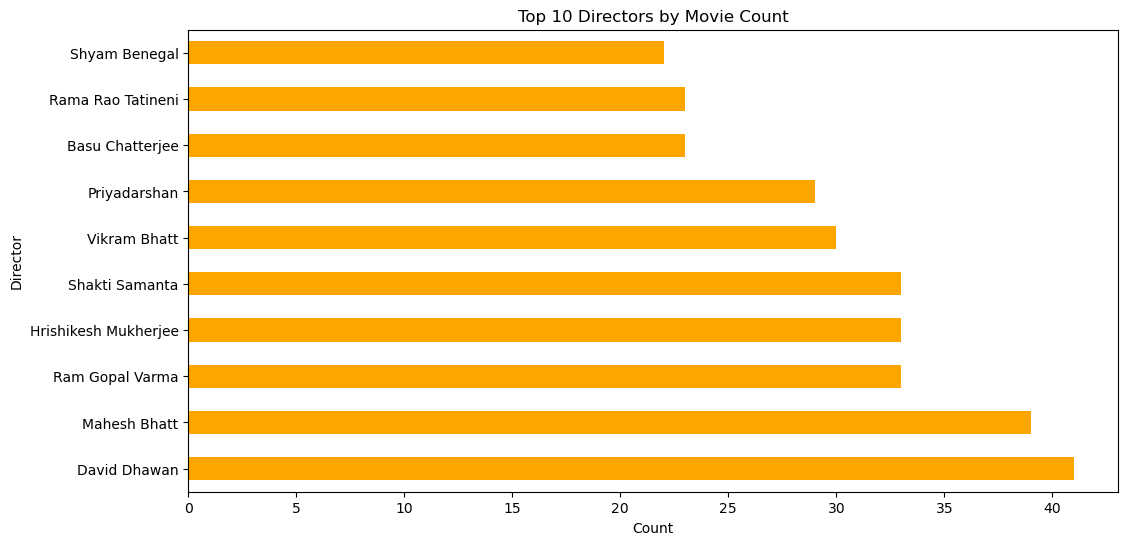

In [27]:
plt.figure(figsize=(12, 6))
director_count = data['Director'].value_counts().head(10)
director_count.plot(kind='barh', color='orange')
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()


# 4. Data Preprocessing

In [28]:
# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

categorical = ["Name","Genre","Director","Actor 1","Actor 2","Actor 3"]
numeric = ["Year","Duration","Votes"]

transformer = ColumnTransformer([("cat",encoder,categorical),
                              ("num",scaler, numeric)])
x = data.drop("Rating" ,axis = 1)
y = data["Rating"]

transform = transformer.fit_transform(x)

print("transform shape :",transform.shape)
print("y shape :",y.shape)

transform shape : (5659, 15032)
y shape : (5659,)


In [29]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.5 ,random_state = 42)

In [30]:
x_train.shape

(2829, 15032)

In [31]:
x_test.shape

(2830, 15032)

In [32]:
y_train.shape

(2829,)

In [33]:
y_test.shape

(2830,)

# 5.  Model Selection and Fine-Tuning or Evaluation

1. **Model Options:**
   - Consider Logistic Regression, Random Forest, and Gradient Boosting.

2. **Data Splitting:**
   - Divide the dataset into training and testing sets (e.g., 80-20 split).

3. **Training:**
   - Train models with default parameters on the training data.

4. **Evaluation:**
   - Use metrics like accuracy, precision, recall, and F1-score for evaluation.
   - Apply cross-validation techniques for robust assessment.

5. **Hyperparameter Tuning:**
   - Fine-tune Random Forest and Gradient Boosting using grid/random search.

6. **Comparison:**
   - Compare models based on evaluation metrics.

7. **Deployment and Monitoring:**
   - Deploy the best-performing model and establish continuous monitoring for accuracy and relevance. Update the model as needed based on changing data patterns.

### GradientBoostingRegressor

In [34]:
# Assuming y_train and y_test are continuous values
mnb = GradientBoostingRegressor()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)
train_predict = mnb.predict(x_train)

# Evaluate the model
train_rmse = mean_squared_error(y_train, mnb.predict(x_train), squared=False)
test_rmse = mean_squared_error(y_test, mnb.predict(x_test), squared=False)

# Print model RMSE
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Training RMSE: 1.06
Test RMSE: 1.12


In [35]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 0.44285175779862396
Test R-squared: 0.30989257757575206


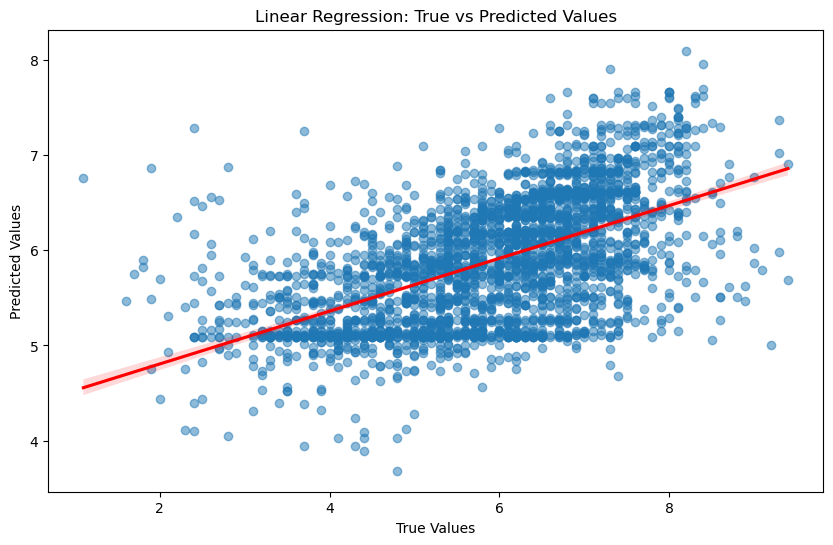

In [36]:
#Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Linear Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### LinearRegression()

In [38]:
# Create and fit the model
ls = LinearRegression()
ls.fit(x_train, y_train)

y_pred = ls.predict(x_test)
train_predict = ls.predict(x_train)

# Print model scores
print("Model Score on Training data:", ls.score(x_train, y_train))
print("Model Score on Testing data:", ls.score(x_test, y_test))

# Make predictions and display regression metrics
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)


Model Score on Training data: 0.9999999878464834
Model Score on Testing data: 0.1807142531000271
Mean Squared Error: 1.480067198162059


In [39]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 0.9999999878464834
Test R-squared: 0.1807142531000271


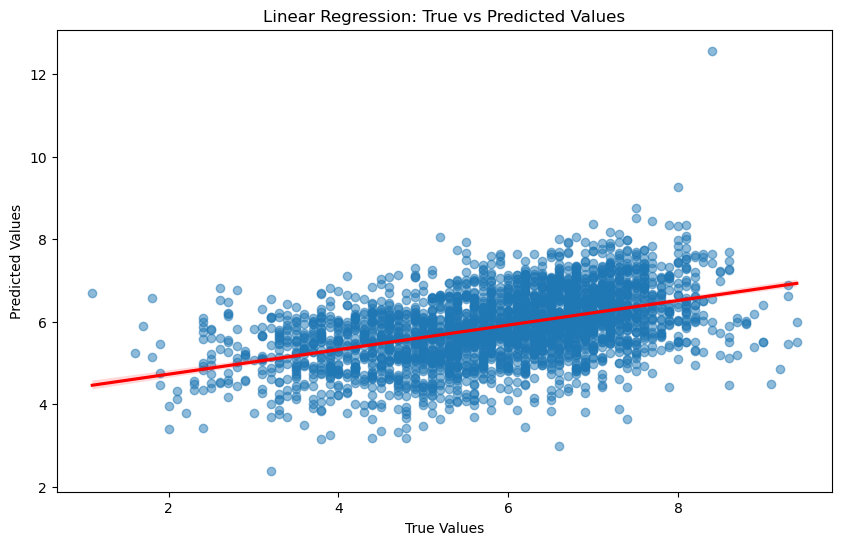

In [40]:
# Linear Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Linear Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DecisionTreeRegressor()

In [42]:
# Create the model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
train_predict = model.predict(x_train)

# Print model scores
print("Model Score on Training data:", model.score(x_train, y_train))
print("Model Score on Testing data:", model.score(x_test, y_test))

# Make predictions and display regression metrics
y_pred = model.predict(x_test)
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)


Model Score on Training data: 1.0
Model Score on Testing data: -0.05848618235759928
Mean Squared Error: 1.912190812720848


In [43]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 1.0
Test R-squared: -0.05848618235759928


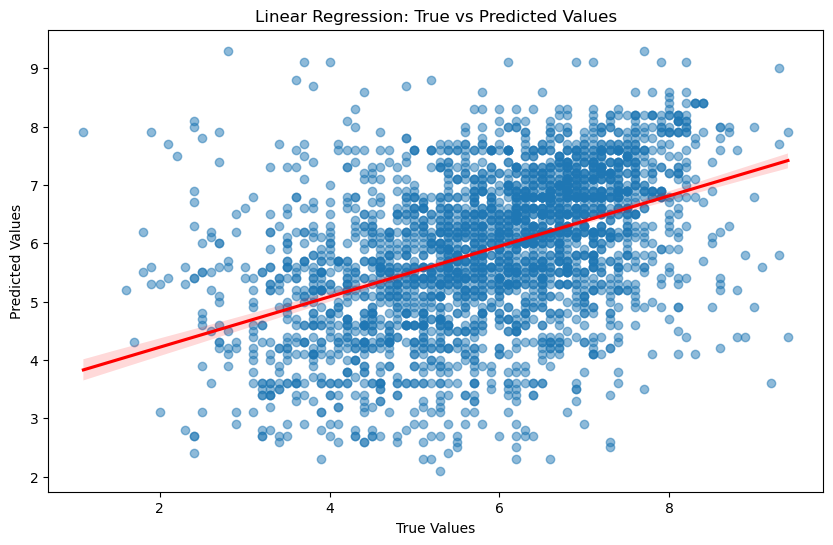

In [44]:
#Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Linear Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### RandomForestRegressor

In [46]:
# Create the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
train_predict = model.predict(x_train)

# Print model scores
print("Model Score on Training data:", model.score(x_train, y_train))
print("Model Score on Testing data:", model.score(x_test, y_test))

# Make predictions and display regression metrics
y_pred = model.predict(x_test)
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)


Model Score on Training data: 0.9095365516420822
Model Score on Testing data: 0.3203563869250785
Mean Squared Error: 1.227798996819788


In [47]:
# Calculate R-squared for training set
train_r2 = r2_score(y_train, train_predict)

# Calculate R-squared for test set
test_r2 = r2_score(y_test, y_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train R-squared: 0.9095365516420822
Test R-squared: 0.3203563869250785


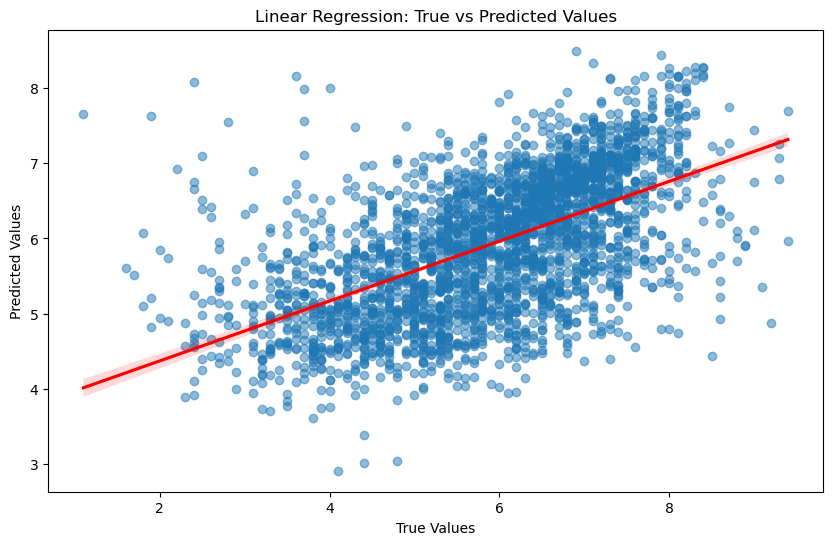

In [48]:
#Regression Graph
plt.figure(figsize=(10, 6))

# Plotting the True vs Predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Linear Regression: True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


**Conclusion:**
- The Gradient Boosting Regressor shows reasonable performance with relatively low RMSE and good R-squared values on both training and testing sets.
- Linear Regression performs well on the training set but does not generalize as effectively to the testing set.
- Decision Tree Regressor and Random Forest Regressor show overfitting, as indicated by the high R-squared on the training set and poor performance on the testing set.

**Best Model:** Considering the balance between training and testing performance, the Gradient Boosting Regressor appears to be the most suitable model for this task. It demonstrates good predictive capabilities while avoiding overfitting.

# Deployment 

In [50]:
# Prepare the input data for prediction
new_data = {
    'Name': ["#Gadhvi (He thought he was Gandhi)","#Yaaram",".Aur Pyaar Ho Gaya","...Yahaan","?: A Question Mark"],
    'Year': [2019, 2019, 1997, 2005, 2012],
    'Duration': [109, 110, 147, 142, 82],
    'Genre': ["Drama", "Comedy, Romance", "Comedy, Drama, Musical", "Drama, Romance, War", "Horror, Mystery, Thriller"],
    'Votes': [8, 35, 827, 1086, 326],
    'Director': ["Gaurav Bakshi", "Ovais Khan", "Rahul Rawail", "Shoojit Sircar", "Allyson Patel"],
    'Actor 1': ["Rasika Dugal", "Prateik", "Bobby Deol", "Jimmy Sheirgill", "Yash Dave"],
    'Actor 2': ['Vivek Ghamande', 'Ishita Raj', 'Aishwarya Rai Bachchan', 'Minissha Lamba', 'Muntazir Ahmad'],
    'Actor 3': ['Arvind Jangid', 'Siddhant Kapoor', 'Shammi Kapoor', 'Yashpal Sharma', 'Kiran Bhatia']
}


In [51]:
# Preprocess the input data
new_data_df = pd.DataFrame(new_data)
new_data_df

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,.Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142,"Drama, Romance, War",1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [52]:
new_data_transformed = transformer.transform(new_data_df)

In [53]:
# Make predictions  from inear Regression
predicted_labels = ls.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [6.12089454 4.40000091 4.81514276 7.39995608 5.60001746]


In [54]:
# Make predictions  from GradientBoostingRegressor model
predicted_labels = mnb.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [6.40228251 5.51198507 5.24023837 5.15308453 5.67407117]


In [55]:
# Make predictions  from RandomForestRegressor model
predicted_labels = model.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [7.249 5.076 4.856 6.606 5.836]


## Thank You! 😊🙌
## We appreciate your time and attention!